In [1]:
import plotly.express as px
import plotly.graph_objects as go
import json
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.io as pio
import folium
import geopandas as gpd

In [2]:
file_path = 'data/provincies/B1_Provinciegrenzen_van_NederlandPolygon.shp'
gdf_prov = gpd.read_file(file_path)

In [3]:
df = pd.read_csv('Stores_province_data.csv', delimiter = ';', index_col = 0)
df1 = []
df.iloc[5, :] #sum of all stores per province
for i in range(0, 12): 
    t = df.iloc[5,i*8] #only print the data from 2012
    df1.append(t)

province1 = ['Groningen', 'Fryslân', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
province = pd.DataFrame(province1, columns = ['Provincie'])
df3 = pd.DataFrame(df1, columns = ['Stores'])
#df2 = pd.read_csv('Stores_province_data_2012.csv', delimiter = ';', index_col = 0)

df_2012 = pd.concat([province,df3], axis=1)

df4 = []
for i in range(0, 12):
    t = df.iloc[5,i*8+7]
    df4.append(t)
df5 = pd.DataFrame(df4, columns = ['Stores'])

df_2019 = pd.concat([province,df5], axis=1)
print(df_2019)

        Provincie  Stores
0       Groningen     850
1         Fryslân    1235
2         Drenthe     810
3      Overijssel    2030
4       Flevoland     665
5      Gelderland    3400
6         Utrecht    2130
7   Noord-Holland    5040
8    Zuid-Holland    5160
9         Zeeland     825
10  Noord-Brabant    4115
11        Limburg    2240


In [4]:
gdf_prov_2012 = pd.merge(gdf_prov, df_2012, left_on='PROV_NAAM', right_on='Provincie', how='left')

gdf_prov_2019 = pd.merge(gdf_prov, df_2019, left_on='PROV_NAAM', right_on='Provincie', how='left')

In [8]:
df = pd.read_csv('Stores_province_data.csv', delimiter = ';', index_col = 0)
df1 = []
df.iloc[5, :] #sum of all stores per province
for i in range(0, 12): 
    t = df.iloc[5,i*8] #only print the data from 2012
    df1.append(t)

province1 = ['Groningen', 'Fryslân', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
province = pd.DataFrame(province1, columns = ['Provincie'])
df3 = pd.DataFrame(df1, columns = ['Stores'])
#df2 = pd.read_csv('Stores_province_data_2012.csv', delimiter = ';', index_col = 0)

df_2012 = pd.concat([province,df3], axis=1)

df4 = []
for i in range(0, 12):
    t = df.iloc[5,i*8+7]
    df4.append(t)
df5 = pd.DataFrame(df4, columns = ['Stores'])

df_2019 = pd.concat([province,df5], axis=1)
print(df_2019)

        Provincie  Stores
0       Groningen     850
1         Fryslân    1235
2         Drenthe     810
3      Overijssel    2030
4       Flevoland     665
5      Gelderland    3400
6         Utrecht    2130
7   Noord-Holland    5040
8    Zuid-Holland    5160
9         Zeeland     825
10  Noord-Brabant    4115
11        Limburg    2240


In [13]:
dftest = []
for i in range(0, 12):
    t = df.iloc[5,i*8]
    u = df.iloc[5,i*8+7]
    dftest.append((t-u)/t*100)
dfnew = pd.DataFrame(dftest, columns = ['Stores decline'])

df_decline = pd.concat([province,dfnew], axis=1)
print(df_decline)

        Provincie  Stores decline
0       Groningen       22.018349
1         Fryslân       21.086262
2         Drenthe       18.592965
3      Overijssel       16.460905
4       Flevoland        5.673759
5      Gelderland       17.973462
6         Utrecht       12.704918
7   Noord-Holland       18.048780
8    Zuid-Holland       19.751166
9         Zeeland       22.535211
10  Noord-Brabant       20.406190
11        Limburg       14.176245


In [14]:
gdf_prov_2012 = pd.merge(gdf_prov, df_decline, left_on='PROV_NAAM', right_on='Provincie', how='left')

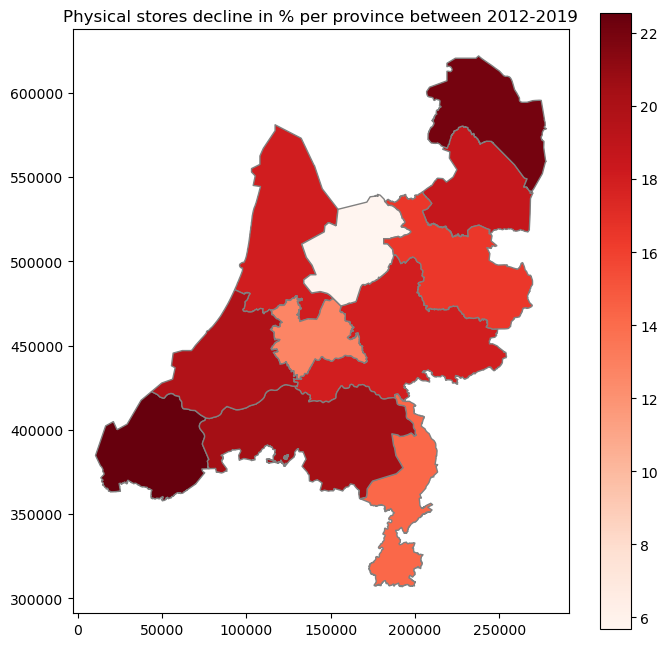

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

column = 'Stores decline'
gdf_prov_2012.plot(ax=ax, edgecolor='gray', cmap='Reds', column=column, legend=True)
plt.title("Physical stores decline in % per province between 2012-2019")
plt.show()
